In [1]:
!pip install pystan~=2.14 -q
!pip install fbprophet -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.express as px

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Marie-92/energy/main/IDF.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Consommation (MW)']]
df.columns = ['ds', 'y']
df.reset_index(drop=True, inplace=True)
df.head()

,ds,y
0,2013-01-16,610978.0
1,2013-01-17,640670.0
2,2013-01-18,653509.0
3,2013-01-19,593948.0
4,2013-01-20,580127.0


In [4]:
split_date = '01-Jan-2021'
X_train = df.loc[df['ds'] <= split_date].copy()
X_test = df.loc[df['ds'] > split_date].copy()

In [5]:
m = Prophet()
m.add_country_holidays(country_name='FR')

In [6]:
m.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
forecast = m.predict(X_test)

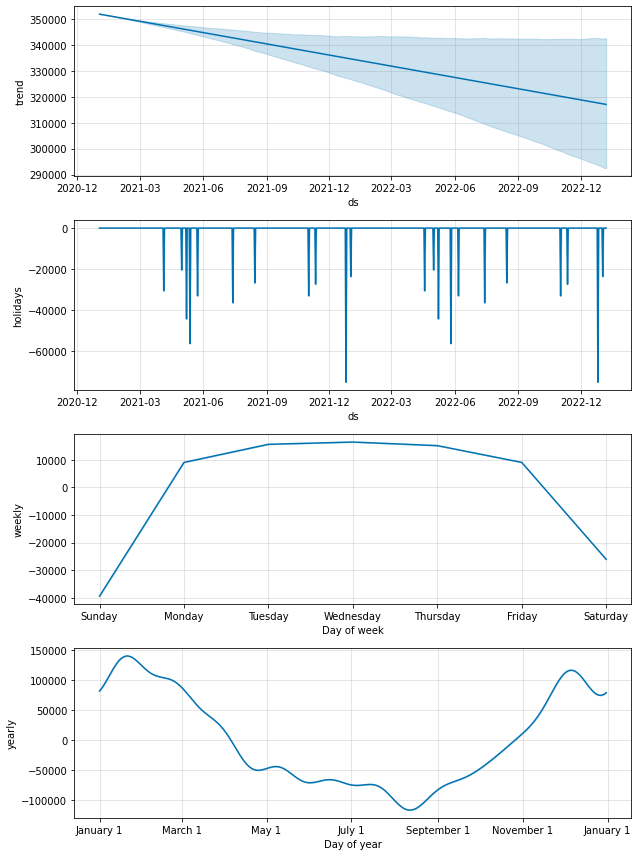

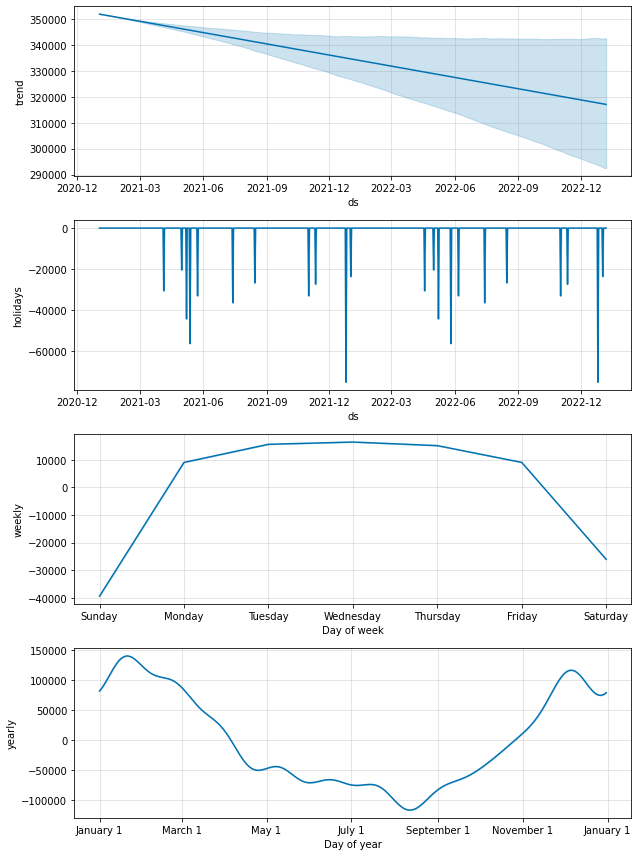

In [8]:
m.plot_components(forecast)

In [9]:
fig = px.line(x = X_test['ds'], y = X_test['y'])
fig.add_trace(px.line(x=forecast['ds'], y=forecast['yhat']).data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()

In [10]:
mse = mean_squared_error(y_true=X_test['y'], y_pred=forecast['yhat'])
mae = mean_absolute_error(y_true=X_test['y'], y_pred=forecast['yhat'])
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_true=X_test['y'], y_pred=forecast['yhat'])

print(f"The MSE on the test set is : {mse}")
print(f"The MAE on the test set is : {mae}")
print(f"The MAPE on the test set is : {mape}")

The MSE on the test set is : 2636925696.2904696
The MAE on the test set is : 42292.21969446388
The MAPE on the test set is : 13.09362393275193
